# Simple Linear Regression
# 1) Delivery_time -> Predict delivery time using sorting time 



In [1]:
#Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import data
delivery_time=pd.read_csv("delivery_time.csv")
delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
# Understanding data
delivery_time.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
delivery_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
delivery_time.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [8]:
len(delivery_time)

21

In [9]:
delivery_time.ndim

2

In [10]:
delivery_time.shape

(21, 2)

In [11]:
delivery_time.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [12]:
delivery_time.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [13]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [28]:
delivery_time.columns=("Delivery_time","Sorting_time")
delivery_time.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:xlabel='Delivery_time', ylabel='Density'>

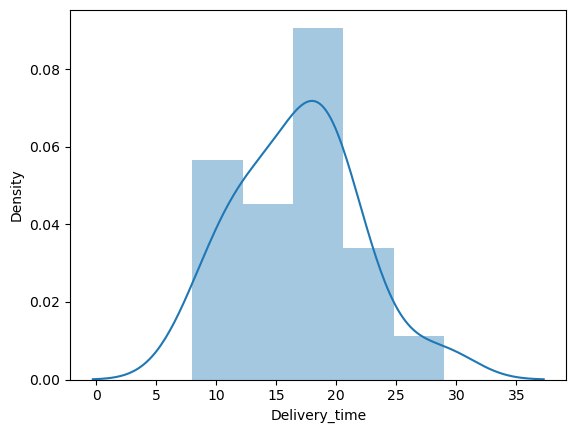

In [115]:
# Check Assumptions
import seaborn as sns
sns.distplot(delivery_time['Delivery_time'])

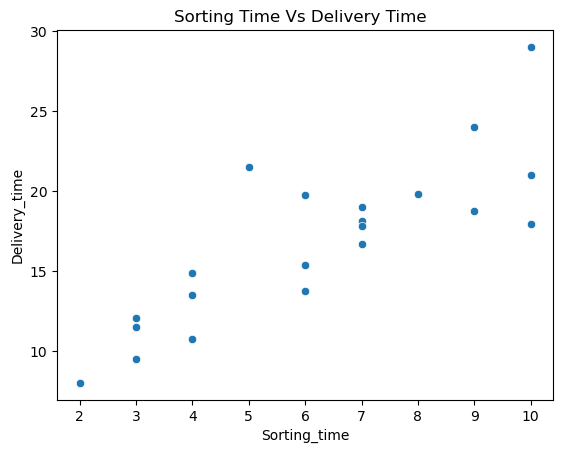

In [116]:
# Linearity 
sns.scatterplot(x = 'Sorting_time', y = 'Delivery_time', data = delivery_time)
plt.title( 'Sorting Time Vs Delivery Time  ')
plt.show()

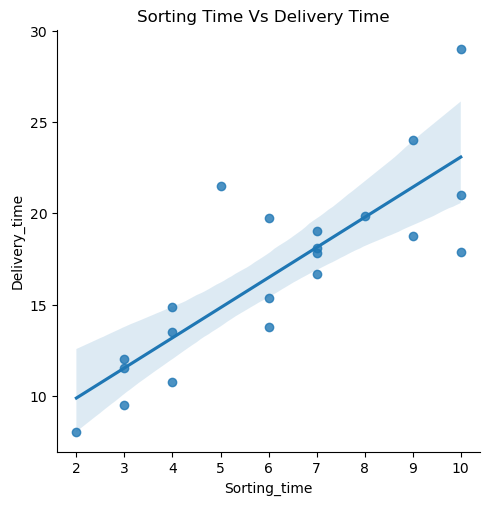

In [117]:
sns.lmplot(x = 'Sorting_time', y = 'Delivery_time', data = delivery_time)
plt.title( 'Sorting Time Vs Delivery Time  ')
plt.show()

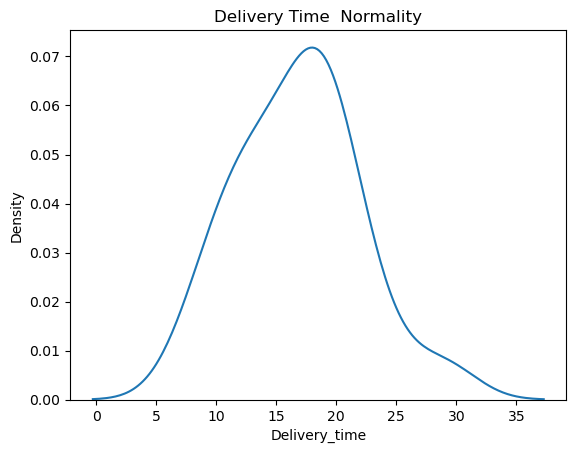

In [121]:
#Normality Test
sns.distplot(a = delivery_time['Delivery_time'],hist=False)
plt.title('Delivery Time  Normality')
plt.show()

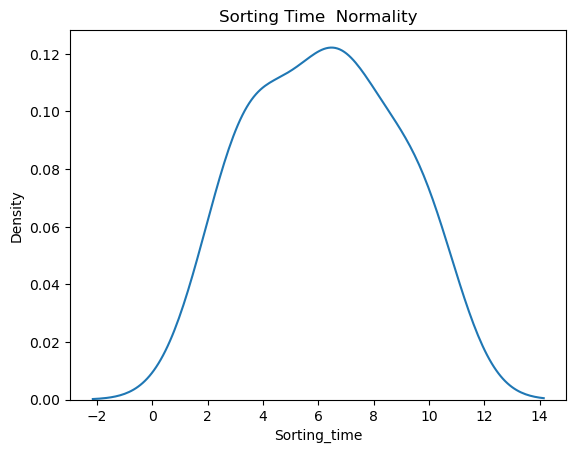

In [122]:
sns.distplot(a = delivery_time['Sorting_time'],hist=False)
plt.title('Sorting Time  Normality')
plt.show()

In [125]:
skew_delivery_time=delivery_time['Delivery_time'].skew()
print('Skewness of delivery time ',skew_delivery_time)

Skewness of delivery time  0.3523900822831107


In [126]:
skew_sorting_time=delivery_time['Sorting_time'].skew()
print('Skewness of sorting time ',skew_sorting_time)

Skewness of sorting time  0.047115474210530174


# Fitting a Linear Regression Model

In [97]:
import statsmodels.formula.api as smf
model=smf.ols("Delivery_time~Sorting_time",data=delivery_time).fit()
model

In [98]:
model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 07 Sep 2023   Prob (F-statistic):           3.98e-06
Time:                        23:09:53   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

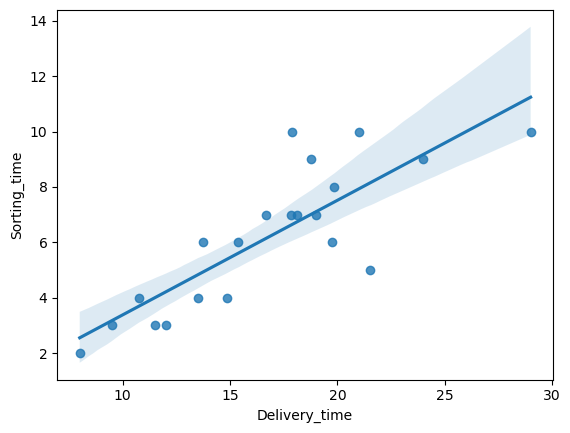

In [99]:
sns.regplot(x="Delivery_time", y="Sorting_time", data=delivery_time);

In [100]:
#Coefficients
model.params 

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [101]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)  

Intercept       3.823349
Sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_time    0.000004
dtype: float64


In [102]:
#R squared values
(model.rsquared,model.rsquared_adj) 

(0.6822714748417231, 0.6655489208860244)

In [103]:
print(f"t value is\n{model.tvalues}\nP value is\n{model.pvalues}\n")
print(f"rsquared= {model.rsquared},\nAdj.rsquared= {model.rsquared_adj}")

t value is
Intercept       3.823349
Sorting_time    6.387447
dtype: float64
P value is
Intercept       0.001147
Sorting_time    0.000004
dtype: float64

rsquared= 0.6822714748417231,
Adj.rsquared= 0.6655489208860244


# Prediction for new data point

In [104]:
data=pd.Series([5,10])
data

0     5
1    10
dtype: int64

In [105]:
data_pred=pd.DataFrame(data,columns=['Sorting_time'])
data_pred

,Sorting_time
0,5
1,10


In [106]:
model.predict(data_pred)

0    14.827833
1    23.072933
dtype: float64

# 2) Salary_hike -> Build a prediction model for Salary_hike

In [127]:
#Import data
Salary_Data=pd.read_csv("Salary_Data.csv")
Salary_Data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [129]:
# Understanding data
Salary_Data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [130]:
Salary_Data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [131]:
Salary_Data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [132]:
len(Salary_Data)

30

In [ ]:
delivery_time.ndim

In [133]:
Salary_Data.shape

(30, 2)

In [134]:
Salary_Data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [135]:
Salary_Data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [136]:
Salary_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

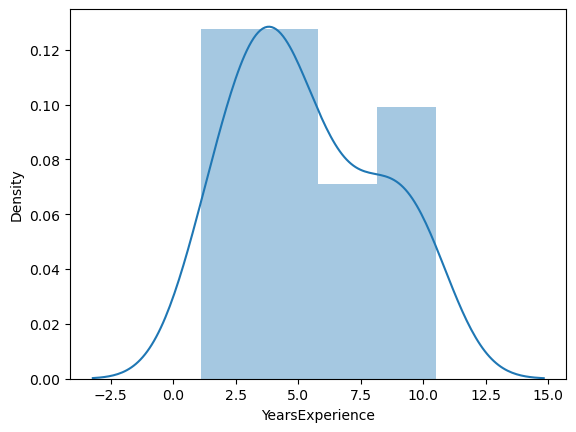

In [137]:
# Check Assumptions
import seaborn as sns
sns.distplot(Salary_Data['YearsExperience'])

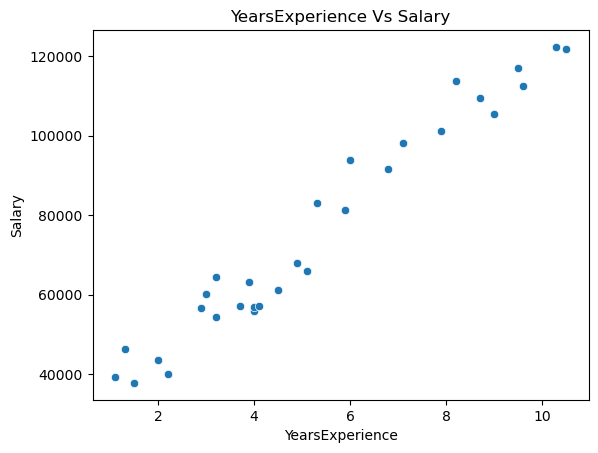

In [138]:
# Linearity 
sns.scatterplot(x = 'YearsExperience', y = 'Salary', data = Salary_Data)
plt.title( 'YearsExperience Vs Salary')
plt.show()

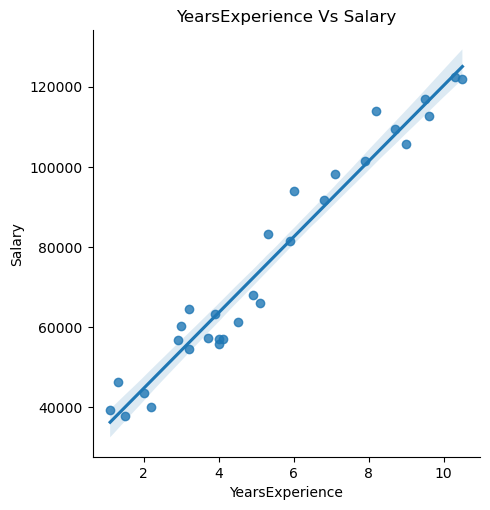

In [139]:
sns.lmplot(x = 'YearsExperience', y = 'Salary', data = Salary_Data)
plt.title( 'YearsExperience Vs Salary')
plt.show()

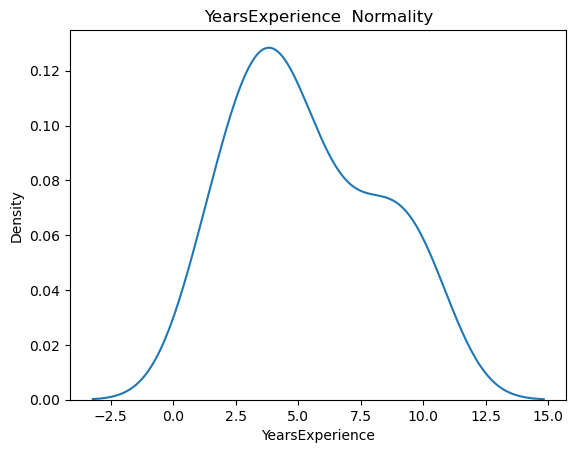

In [142]:
#Normality Test
sns.distplot(a = Salary_Data['YearsExperience'],hist=False)
plt.title('YearsExperience  Normality')
plt.show()

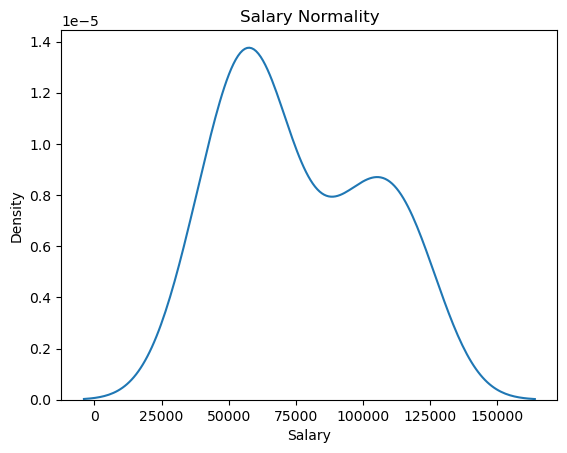

In [143]:
sns.distplot(a = Salary_Data['Salary'],hist=False)
plt.title('Salary Normality')
plt.show()

In [144]:
skew_salary_data=Salary_Data['YearsExperience'].skew()
print('Skewness of YearsExperience ',skew_salary_data)

Skewness of YearsExperience  0.37956024064804106


In [145]:
skew_salary_data=Salary_Data['Salary'].skew()
print('Skewness of Salary',skew_salary_data)

Skewness of Salary 0.35411967922959153


# Fitting a Linear Regression Model

In [172]:
import statsmodels.formula.api as smf
model1=smf.ols("Salary~YearsExperience",data=Salary_Data).fit()
model1

In [173]:
model1.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        00:01:49   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

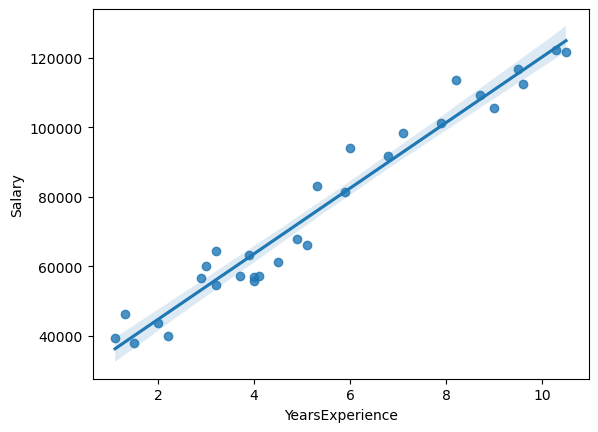

In [174]:
sns.regplot(x="YearsExperience", y="Salary", data=Salary_Data);

In [175]:
#Coefficients
model1.params 

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [176]:
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues)  

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [177]:
#R squared values
(model1.rsquared,model1.rsquared_adj) 

(0.9569566641435086, 0.9554194021486339)

In [178]:
print(f"t value is\n{model1.tvalues}\nP value is\n{model1.pvalues}\n")
print(f"rsquared= {model1.rsquared},\nAdj.rsquared= {model1.rsquared_adj}")

t value is
Intercept          11.346940
YearsExperience    24.950094
dtype: float64
P value is
Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

rsquared= 0.9569566641435086,
Adj.rsquared= 0.9554194021486339


# Prediction for new data point

In [186]:
data1=pd.Series([2.3,3.5])
data1

0    2.3
1    3.5
dtype: float64

In [187]:
data_pred1=pd.DataFrame(data1,columns=['YearsExperience'])
data_pred1

,YearsExperience
0,2.3
1,3.5


In [188]:
model1.predict(data_pred1)

0    47527.113538
1    58867.068324
dtype: float64